In [29]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [30]:
# importing dataset
df_train = pd.read_csv("../01_dataset/train.csv")
df_test = pd.read_csv("../01_dataset/test.csv")
df_submission = pd.read_csv("../01_dataset/sample_submission.csv")

In [31]:
# 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [32]:
df_train.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


### Spliting Train and Validation dataset

In [33]:
X = df_train.drop(["id","Hardness"], axis=1)
y = df_train["Hardness"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = df_test.drop("id", axis=1)

In [34]:
X_train

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
2124,30.00,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.51006
394,64.00,13.385996,23.000000,4.000000,55.641640,9.013750,2.220000,1.908000,1.224000,0.474324,4.74000
3101,97.00,13.477328,12.125000,4.375000,24.988133,11.037175,2.543750,1.720000,0.952500,0.486599,1.79976
1737,151.00,22.980000,50.333333,4.333333,121.022733,8.531800,2.043333,2.076667,1.366667,0.416920,7.77500
561,131.00,24.150564,17.333333,4.666667,38.897020,10.459208,2.575833,1.753333,0.973333,0.473697,1.92652
...,...,...,...,...,...,...,...,...,...,...,...
5734,68.00,8.147992,13.600000,4.800000,29.568292,10.789170,2.760000,1.740000,0.860000,0.482036,1.50239
5191,129.48,30.655328,21.833333,4.400000,49.503082,11.824267,2.190000,1.912720,0.936000,0.474107,4.49372
5390,127.00,27.104327,31.750000,4.500000,68.700500,9.251425,2.240000,1.907500,1.200000,0.462867,2.96536
860,236.18,23.409984,10.812500,4.800000,22.111243,11.003309,2.663750,1.743750,0.843750,0.495607,0.51006


### Scalling 

In [35]:
# using min max scaler to transform data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

def scaling_data(scaler, train, val, test):
    train_scaled = scaler.fit_transform(train)
    val_scaled = scaler.transform(val)
    test_scaled = scaler.transform(test)

    train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
    val_scaled = pd.DataFrame(val_scaled, columns=val.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=test.columns)
    
    return train_scaled, val_scaled, test_scaled

### Select K-Best features

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import median_absolute_error

def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    return predictions_train, predictions_test


def validate_model(y_test, predictions):
    return median_absolute_error(y_test, predictions)


# Define different models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    DecisionTreeRegressor(max_depth=5),
    RandomForestRegressor(n_estimators=100),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    SVR(kernel='rbf', C=1.0, epsilon=0.2)
]

In [37]:
# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'MAE - Train','MAE - Validation'])

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#X_test = df_test.drop("id", axis=1)

scaler = StandardScaler() # MinMaxScaler() 
X_train_scaled, X_val_scaled, X_test_scaled = scaling_data(scaler, X_train, X_val, X_test)


# Iterate over models
for model in models:
    predictions_train, predictions_val = train_and_predict(model, X_train_scaled, y_train, X_val_scaled)
    train_mde = validate_model(y_train, predictions_train)
    medae = validate_model(y_val, predictions_val)
    new_row = pd.DataFrame({'Model': [model.__class__.__name__], 
                            'MAE - Train': [train_mde],
                            'MAE - Validation': [medae]})
    results = pd.concat([results, new_row], ignore_index=True)

results.sort_values("MAE - Validation", ascending=True)

,Model,MAE - Train,MAE - Validation
6,SVR,0.585650,0.631687
4,RandomForestRegressor,0.237000,0.678500
5,GradientBoostingRegressor,0.667694,0.696434
3,DecisionTreeRegressor,0.746667,0.804473
1,Ridge,0.956080,0.974273
0,LinearRegression,0.956186,0.974693
2,Lasso,1.057251,1.063166


In [38]:
# SVR is the best fit model for the 
model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

model.fit(X,y)

df_submission['Hardness']=model.predict(X_test)

In [39]:
df_submission.head()

,id,Hardness
0,10407,2.700371
1,10408,5.012113
2,10409,5.698748
3,10410,5.813707
4,10411,5.177655


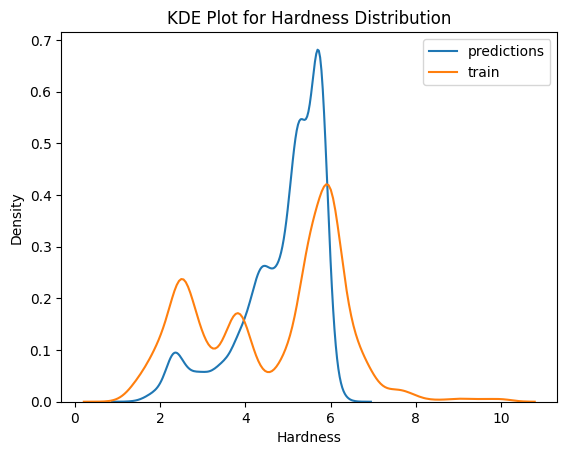

In [40]:
# Visualisation to view Hardness distribution over training Hardness and Test predictions. 

# Create a KDE plot
sns.kdeplot(df_submission['Hardness'], bw_adjust=1,label='predictions')
sns.kdeplot(y, bw_adjust=1, label='train')

# Additional optional settings
plt.title('KDE Plot for Hardness Distribution')
plt.xlabel('Hardness')
plt.ylabel('Density')
plt.legend()
plt.show()

In [41]:
df_submission.head()

,id,Hardness
0,10407,2.700371
1,10408,5.012113
2,10409,5.698748
3,10410,5.813707
4,10411,5.177655


In [42]:
# Using all features with StandardScaler() and SVR model.
df_submission.to_csv("../03_output/mohs-hardness-s3e25-version-1.csv", index=False)

